# Grado de marginación en la Ciudad de México a nivel AGEB

#Utilizando el grado de marginación que calcula CONAPO para las AGEB urbanas del país y el shape con la información poblacional del SCINCE, elaborado por el INEGI, se pretende encontrar patrones geográficos en las AGEB de la Ciudad de México, de acuerdo con el grado de marginación que presentan.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#Shape de AGEB urbanas de INEGI
shapeAgeb=gpd.read_file('C:/Users/DIAO_ACTURIA/Documents/Python Scripts/Python/shp_cdmx/ageb_urb.shp')

In [25]:
shapeAgeb.head()

,CVEAGEB,POB1,POB2,POB2_R,POB3,POB3_R,POB4,POB4_R,POB5,POB5_R,...,POB78,POB78_R,POB79,POB79_R,POB80,POB80_R,POB81,POB81_R,OID,geometry
0,0900200010010,3424,71,2.1,125,3.7,77,2.2,235,6.9,...,1056,66.0,358,22.4,300,18.8,191,11.9,1,"POLYGON ((2792673.308524352 837911.4750908648,..."
1,0900200010025,5912,206,3.5,364,6.2,241,4.1,466,7.9,...,1760,62.4,468,16.6,245,8.7,135,4.8,2,"POLYGON ((2793350.822773742 837765.3497706538,..."
2,090020001003A,4638,157,3.4,254,5.5,137,3.0,347,7.5,...,1377,61.2,417,18.5,337,15.0,203,9.0,3,"POLYGON ((2792311.17880615 837633.5167797694, ..."
3,0900200010044,5007,148,3.0,268,5.4,162,3.2,391,7.8,...,1445,62.4,436,18.8,295,12.7,164,7.1,4,"POLYGON ((2792448.206535 837485.6465441301, 27..."
4,0900200010097,2260,56,2.5,117,5.2,82,3.6,150,6.6,...,718,66.7,237,22.0,163,15.1,84,7.8,5,"POLYGON ((2792415.238538118 836846.39013781, 2..."


In [28]:
type(shapeAgeb)

geopandas.geodataframe.GeoDataFrame

In [3]:
#Base de grado de marginación de CONAPO
marginacion=pd.read_csv('C:/Users/DIAO_ACTURIA/Documents/Python Scripts/Python/Base_IMU_2010_CONAPO_VF.csv')

In [4]:
marginacion.head()

,Clave de AGEB,Entidad,Municipio,Localidad,Ageb,Población total,% Población de 6 a 14 años que no asiste a la escuela (I1),% Población de 15 años o más sin secundaria completa (I2),% Población sin derecho- habiencia a los servicios de salud (I3),% Hijos fallecidos de las mujeres de 15 a 49 años (I4),...,% Viviendas particulares con piso de tierra (I8),% Viviendas particulares con algún nivel de hacinamiento (I9),% Viviendas particulares sin refrigerador (I10),Clave de SUN,Ciudad,Índice de marginación urbana 2010,Grado de marginación urbana 2010,Lugar que ocupa en el contexto estatal,Lugar que ocupa en el contexto nacional,Unnamed: 22
0,0100100010229,1.0,1.0,1.0,0229,410,3.448,35.018,30.488,5.051,...,2.885,20.192,9.615,1.0,Aguascalientes,-0.47349,Medio,136,26 936,3.0
1,0100100010233,1.0,1.0,1.0,0233,1 536,7.143,36.321,26.850,3.863,...,1.667,19.240,8.831,1.0,Aguascalientes,-0.48047,Medio,138,27 085,3.0
2,0100100010286,1.0,1.0,1.0,0286,3 469,1.777,17.462,27.101,1.509,...,2.648,5.482,1.016,1.0,Aguascalientes,-1.16440,Muy bajo,330,40 366,1.0
3,0100100010290,1.0,1.0,1.0,0290,1 884,1.770,19.616,31.308,1.354,...,0.198,7.769,0.595,1.0,Aguascalientes,-1.14669,Muy bajo,325,40 069,1.0
4,0100100010303,1.0,1.0,1.0,0303,2 397,3.779,31.610,30.387,2.326,...,0.160,14.240,2.885,1.0,Aguascalientes,-0.84350,Bajo,250,34 345,2.0


In [29]:
type(marginacion)

pandas.core.frame.DataFrame

In [6]:
#Seleccionamos las AGEB de la CDMX
cdmx=marginacion.loc[marginacion.Entidad==9.0,:]

In [26]:
cdmx.head()

,CVEAGEB,Entidad,Municipio,Localidad,Ageb,Población total,% Población de 6 a 14 años que no asiste a la escuela (I1),% Población de 15 años o más sin secundaria completa (I2),% Población sin derecho- habiencia a los servicios de salud (I3),% Hijos fallecidos de las mujeres de 15 a 49 años (I4),...,% Viviendas particulares con piso de tierra (I8),% Viviendas particulares con algún nivel de hacinamiento (I9),% Viviendas particulares sin refrigerador (I10),Clave de SUN,Ciudad,Índice de marginación urbana 2010,Grado de marginación urbana 2010,Lugar que ocupa en el contexto estatal,Lugar que ocupa en el contexto nacional,marg
7707,0900200010010,9.0,2.0,1.0,0010,3 424,0.551,27.083,23.233,2.590,...,0.623,14.691,0.741,13.0,Valle de México,-1.04783,Muy bajo,1 733,38 316,1.0
7708,0900200010025,9.0,2.0,1.0,0025,5 912,1.923,31.218,18.227,2.545,...,0.000,21.973,2.689,13.0,Valle de México,-0.93789,Bajo,1 567,36 219,2.0
7709,090020001003A,9.0,2.0,1.0,003A,4 638,2.925,32.723,19.735,2.402,...,0.000,23.435,1.162,13.0,Valle de México,-0.89754,Bajo,1 505,35 394,2.0
7710,0900200010044,9.0,2.0,1.0,0044,5 007,2.460,29.751,22.020,1.983,...,0.159,18.375,1.896,13.0,Valle de México,-0.97616,Muy bajo,1 626,36 940,1.0
7711,0900200010097,9.0,2.0,1.0,0097,2 260,3.556,29.563,20.336,2.011,...,0.360,12.007,0.898,13.0,Valle de México,-1.01982,Muy bajo,1 692,37 804,1.0


In [7]:
#Renombramos la variable llave
shapeAgeb=shapeAgeb.rename(columns={'CVEGEO':'CVEAGEB'})

In [8]:
cdmx=cdmx.rename(columns={'Clave de AGEB':'CVEAGEB'})

In [21]:
#Merge entre shapeAgeb y cdmx
AgebCdmx = pd.merge(shapeAgeb,cdmx,how='inner',on='CVEAGEB')

In [27]:
type(AgebCdmx)

geopandas.geodataframe.GeoDataFrame

In [22]:
AgebCdmx.head()

,CVEAGEB,POB1,POB2,POB2_R,POB3,POB3_R,POB4,POB4_R,POB5,POB5_R,...,% Viviendas particulares con piso de tierra (I8),% Viviendas particulares con algún nivel de hacinamiento (I9),% Viviendas particulares sin refrigerador (I10),Clave de SUN,Ciudad,Índice de marginación urbana 2010,Grado de marginación urbana 2010,Lugar que ocupa en el contexto estatal,Lugar que ocupa en el contexto nacional,marg
0,0900200010010,3424,71,2.1,125,3.7,77,2.2,235,6.9,...,0.623,14.691,0.741,13.0,Valle de México,-1.04783,Muy bajo,1 733,38 316,1.0
1,0900200010025,5912,206,3.5,364,6.2,241,4.1,466,7.9,...,0.000,21.973,2.689,13.0,Valle de México,-0.93789,Bajo,1 567,36 219,2.0
2,090020001003A,4638,157,3.4,254,5.5,137,3.0,347,7.5,...,0.000,23.435,1.162,13.0,Valle de México,-0.89754,Bajo,1 505,35 394,2.0
3,0900200010044,5007,148,3.0,268,5.4,162,3.2,391,7.8,...,0.159,18.375,1.896,13.0,Valle de México,-0.97616,Muy bajo,1 626,36 940,1.0
4,0900200010097,2260,56,2.5,117,5.2,82,3.6,150,6.6,...,0.360,12.007,0.898,13.0,Valle de México,-1.01982,Muy bajo,1 692,37 804,1.0


In [12]:
type(AgebCdmx)

geopandas.geodataframe.GeoDataFrame

In [13]:
AgebCdmx.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2366 entries, 0 to 2365
Columns: 181 entries, CVEAGEB to Unnamed: 22
dtypes: float64(96), int64(77), object(8)
memory usage: 3.3+ MB


In [14]:
shapeAgeb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Columns: 159 entries, CVEAGEB to geometry
dtypes: float64(80), int64(77), object(2)
memory usage: 3.0+ MB


In [20]:
cdmx=cdmx.rename(columns={'Unnamed: 22':'marg'})

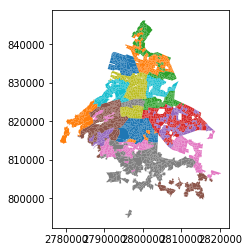

In [18]:
#Graficamos las AGEB de la CDMX
AgebCdmx.plot(column='CVEAGEB')

In [23]:
#Agrupamos por grado de marginación y contamos el número de AGEB para cada grado de marginación
AgebCdmx.groupby('marg').count()

,CVEAGEB,POB1,POB2,POB2_R,POB3,POB3_R,POB4,POB4_R,POB5,POB5_R,...,% Viviendas particulares sin excusado con conexión de agua (I7),% Viviendas particulares con piso de tierra (I8),% Viviendas particulares con algún nivel de hacinamiento (I9),% Viviendas particulares sin refrigerador (I10),Clave de SUN,Ciudad,Índice de marginación urbana 2010,Grado de marginación urbana 2010,Lugar que ocupa en el contexto estatal,Lugar que ocupa en el contexto nacional
marg,,,,,,,,,,,,,,,,,,,,,
1.0,762,762,762,762,762,762,762,762,762,762,...,762,762,762,762,762,762,762,762,762,762
2.0,579,579,579,579,579,579,579,579,579,579,...,579,579,579,579,579,579,579,579,579,579
3.0,762,762,762,762,762,762,762,762,762,762,...,762,762,762,762,762,762,762,762,762,762
4.0,239,239,239,239,239,239,239,239,239,239,...,239,239,239,239,239,239,239,239,239,239
5.0,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24


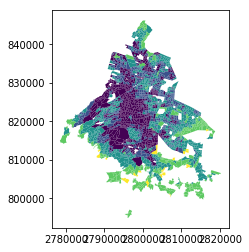

In [30]:
#Graficamos las AGEB de la CDMX por grado de marginación, y observamos que sí existe un patrón entre el nivel de marginación en las diferentes zonas de la ciudad
AgebCdmx.plot(column='marg')

In [32]:
# Número de Agebs por municipio

AgebCdmx.groupby('Municipio').count()

,CVEAGEB,POB1,POB2,POB2_R,POB3,POB3_R,POB4,POB4_R,POB5,POB5_R,...,% Viviendas particulares con piso de tierra (I8),% Viviendas particulares con algún nivel de hacinamiento (I9),% Viviendas particulares sin refrigerador (I10),Clave de SUN,Ciudad,Índice de marginación urbana 2010,Grado de marginación urbana 2010,Lugar que ocupa en el contexto estatal,Lugar que ocupa en el contexto nacional,marg
Municipio,,,,,,,,,,,,,,,,,,,,,
2.0,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
3.0,155,155,155,155,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
4.0,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
5.0,299,299,299,299,299,299,299,299,299,299,...,299,299,299,299,299,299,299,299,299,299
6.0,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
7.0,450,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,450,450,450,450,450
8.0,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
9.0,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
10.0,196,196,196,196,196,196,196,196,196,196,...,196,196,196,196,196,196,196,196,196,196


In [34]:
AgebCdmx.groupby(['Municipio','marg']).count()

CVEAGEB  POB1  POB2  POB2_R  POB3  POB3_R  POB4  POB4_R  POB5  \
Municipio marg                                                                  
2.0       1.0        40    40    40      40    40      40    40      40    40   
          2.0        43    43    43      43    43      43    43      43    43   
          3.0        17    17    17      17    17      17    17      17    17   
          4.0         2     2     2       2     2       2     2       2     2   
3.0       1.0       107   107   107     107   107     107   107     107   107   
          2.0        22    22    22      22    22      22    22      22    22   
          3.0        25    25    25      25    25      25    25      25    25   
          4.0         1     1     1       1     1       1     1       1     1   
4.0       1.0         3     3     3       3     3       3     3       3     3   
          2.0        11    11    11      11    11      11    11      11    11   
          3.0        10    10    10      10    10      10    10      10    10   
          4.0         7     7     7       7     7       7     7       7     7   
5.0       1.0        80    80    80      80    80      80    80      80    80   
          2.0        88    88    88      88    88      88    88      88    88   
          3.0       108   108   108     108   108     108   108     108   108   
          4.0        23    23    23      23    23      23    23      23    23   
6.0       1.0        24    24    24      24    24      24    24      24    24   
          2.0        42    42    42      42    42      42    42      42    42   
          3.0        41    41    41      41    41      41    41      41    41   
7.0       1.0        54    54    54      54    54      54    54      54    54   
          2.0       117   117   117     117   117     117   117     117   117   
          3.0       199   199   199     199   199     199   199     199   199   
          4.0        79    79    79      79    79      79    79      79    79   
          5.0         1     1     1       1     1       1     1       1     1   
8.0       1.0        12    12    12      12    12      12    12      12    12   
          2.0        18    18    18      18    18      18    18      18    18   
          3.0        17    17    17      17    17      17    17      17    17   
          4.0         3     3     3       3     3       3     3       3     3   
          5.0         2     2     2       2     2       2     2       2     2   
9.0       3.0         6     6     6       6     6       6     6       6     6   
...                 ...   ...   ...     ...   ...     ...   ...     ...   ...   
10.0      4.0         3     3     3       3     3       3     3       3     3   
11.0      1.0         7     7     7       7     7       7     7       7     7   
          2.0        13    13    13      13    13      13    13      13    13   
          3.0        69    69    69      69    69      69    69      69    69   
          4.0        14    14    14      14    14      14    14      14    14   
          5.0         3     3     3       3     3       3     3       3     3   
12.0      1.0        70    70    70      70    70      70    70      70    70   
          2.0        21    21    21      21    21      21    21      21    21   
          3.0        62    62    62      62    62      62    62      62    62   
          4.0        38    38    38      38    38      38    38      38    38   
          5.0         5     5     5       5     5       5     5       5     5   
13.0      1.0        15    15    15      15    15      15    15      15    15   
          2.0        13    13    13      13    13      13    13      13    13   
          3.0        43    43    43      43    43      43    43      43    43   
          4.0        34    34    34      34    34      34    34      34    34   
          5.0        12    12    12      12    12      12    12      12    12   
14.0      1.0        97    97    97      97    